In [1]:
!pip install yfinance matplotlib pandas

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


You should consider upgrading via the '/Users/andreneptunejr/.pyenv/versions/3.8.16/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
from datetime import datetime

# Define the start and end dates (past 2 years)
start_date = datetime(2022, 1, 1)
end_date = datetime(2024, 1, 1)

# Download the historical stock data
stock = yf.download("AAPL", start=start_date, end=end_date)
print(stock.head())


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-01-03  179.076584  182.009995  182.880005  177.710007  177.830002   
2022-01-04  176.803833  179.699997  182.940002  179.119995  182.630005   
2022-01-05  172.100845  174.919998  180.169998  174.639999  179.610001   
2022-01-06  169.227890  172.000000  175.300003  171.639999  172.699997   
2022-01-07  169.395157  172.169998  174.139999  171.029999  172.889999   

Price          Volume  
Ticker           AAPL  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


In [3]:
# Check for missing data
print(stock.isnull().sum())

# Handle missing data with forward fill
stock_ffill = stock.ffill()

# Handle missing data with backward fill
stock_bfill = stock.bfill()

# Handle missing data with interpolation
stock_interp = stock.interpolate()

# Remove duplicates
stock_cleaned = stock_interp.drop_duplicates()


Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64


In [4]:
# Ensure the index is in datetime format
stock_cleaned.index = pd.to_datetime(stock_cleaned.index)


In [5]:
# Create a formatted date column
stock_cleaned['Formatted Date'] = stock_cleaned.index.strftime('%m-%d-%Y')
print(stock_cleaned[['Formatted Date']].head())


Price      Formatted Date
Ticker                   
Date                     
2022-01-03     01-03-2022
2022-01-04     01-04-2022
2022-01-05     01-05-2022
2022-01-06     01-06-2022
2022-01-07     01-07-2022


In [6]:
print("Index Frequency:", pd.infer_freq(stock_cleaned.index))
print("First Date:", stock_cleaned.index.min())
print("Last Date:", stock_cleaned.index.max())
print("Time Period Covered:", stock_cleaned.index.max() - stock_cleaned.index.min())


Index Frequency: None
First Date: 2022-01-03 00:00:00
Last Date: 2023-12-29 00:00:00
Time Period Covered: 725 days 00:00:00


In [7]:
# Create a date range with the last business day of each month
bm_dates = pd.date_range(start=stock_cleaned.index.min(), end=stock_cleaned.index.max(), freq='BM')

# Filter the original DataFrame for these dates
stock_bm = stock_cleaned.loc[stock_cleaned.index.isin(bm_dates)]
print(stock_bm)


Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-01-31  171.963120  174.779999  175.000000  169.509995  170.160004   
2022-02-28  162.665787  165.119995  165.419998  162.429993  163.059998   
2022-03-31  172.014755  174.610001  178.029999  174.399994  177.839996   
2022-04-29  155.306808  157.649994  166.199997  157.250000  161.839996   
2022-05-31  146.843185  148.839996  150.660004  146.839996  149.070007   
2022-06-30  134.885803  136.720001  138.369995  133.770004  137.250000   
2022-07-29  160.329803  162.509995  163.630005  159.500000  161.240005   
2022-08-31  155.326218  157.220001  160.580002  157.139999  160.309998   
2022-09-30  136.535339  138.199997  143.100006  138.000000  141.279999   
2022-10-31  151.492966  153.339996  154.240005  151.919998  153.160004   
2022-11-30  146.489517  148.029999  14

In [8]:
# Shift stock prices by 1 day forward and backward
stock_shifted_forward = stock_cleaned['Close'].shift(1)
stock_shifted_backward = stock_cleaned['Close'].shift(-1)

# Calculate 7-day rolling mean
stock_cleaned['7-Day Rolling Mean'] = stock_cleaned['Close'].rolling(window=7).mean()


In [9]:
# Resample to weekly frequency, calculating the mean Close price
weekly_resample = stock_cleaned['Close'].resample('W').mean()

# Resample to hourly frequency and fill missing values with the mean
hourly_resample = stock_cleaned['Close'].resample('H').mean().fillna(stock_cleaned['Close'].mean())


<Figure size 1000x600 with 0 Axes>

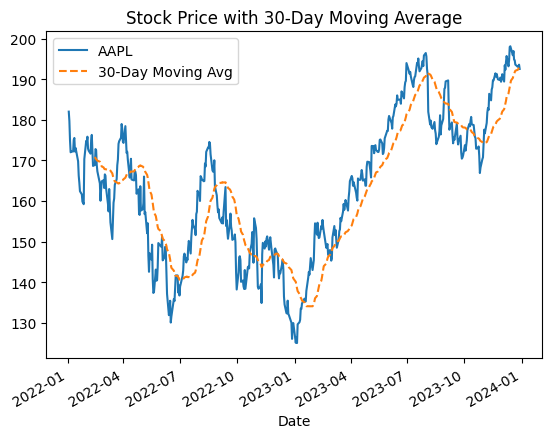

In [10]:
# Calculate 30-day moving average
stock_cleaned['30-Day Moving Avg'] = stock_cleaned['Close'].rolling(window=30).mean()

# Plot the Close price and 30-day moving average
plt.figure(figsize=(10, 6))
stock_cleaned['Close'].plot(label='Close Price')
stock_cleaned['30-Day Moving Avg'].plot(label='30-Day Moving Avg', linestyle='--')
plt.title("Stock Price with 30-Day Moving Average")
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

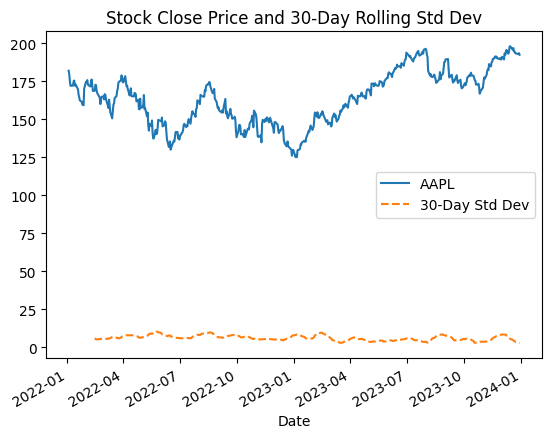

In [11]:
# Calculate percentage change of the Close price
stock_cleaned['Pct Change'] = stock_cleaned['Close'].pct_change()

# Calculate rolling standard deviation over 30 days
stock_cleaned['30-Day Std Dev'] = stock_cleaned['Close'].rolling(window=30).std()

# Plot the results
plt.figure(figsize=(10, 6))
stock_cleaned['Close'].plot(label='Close Price')
stock_cleaned['30-Day Std Dev'].plot(label='30-Day Std Dev', linestyle='--')
plt.title("Stock Close Price and 30-Day Rolling Std Dev")
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

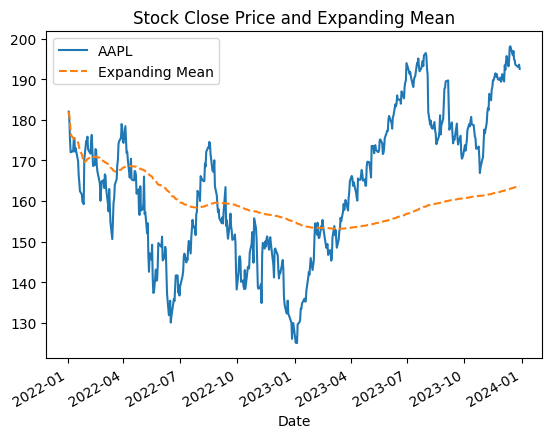

In [12]:
# Calculate the expanding mean
stock_cleaned['Expanding Mean'] = stock_cleaned['Close'].expanding().mean()

# Plot Close price and expanding mean
plt.figure(figsize=(10, 6))
stock_cleaned['Close'].plot(label='Close Price')
stock_cleaned['Expanding Mean'].plot(label='Expanding Mean', linestyle='--')
plt.title("Stock Close Price and Expanding Mean")
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

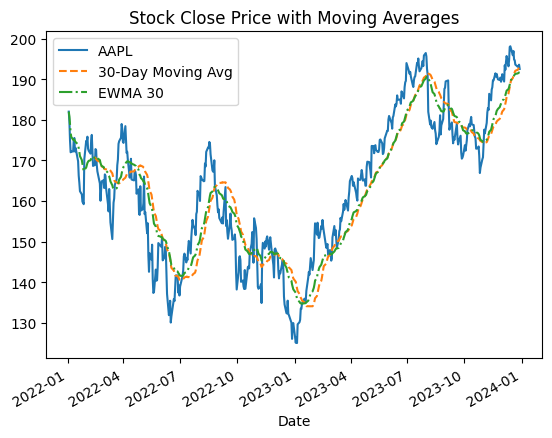

In [13]:
# Calculate the exponentially weighted moving average over 30 days
stock_cleaned['EWMA 30'] = stock_cleaned['Close'].ewm(span=30).mean()

# Plot the original Close price, 30-day moving average, and EWMA
plt.figure(figsize=(10, 6))
stock_cleaned['Close'].plot(label='Close Price')
stock_cleaned['30-Day Moving Avg'].plot(label='30-Day Moving Avg', linestyle='--')
stock_cleaned['EWMA 30'].plot(label='EWMA 30', linestyle='-.')
plt.title("Stock Close Price with Moving Averages")
plt.legend()
plt.show()
